## 1.0 Importing libaries and dependencies

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Reading in data 

In [219]:
data = pd.read_csv('data/train.csv')
meal_data = pd.read_csv('data/meal_info.csv')
fulfilment = pd.read_csv('data/fulfilment_center_info.csv')
sample = pd.read_csv('data/sample_submission.csv')
history = pd.read_csv('data/historical_product_demand.csv')

In [220]:
data = pd.merge(data, fulfilment, how = "left", on = "center_id")
data = pd.merge(data, meal_data, how = "left", on = "meal_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

### 1.2 Creating a data frame

In [221]:
train_df = data[data['week'].between(1, 118)]
test_df = data[data['week'].between(119, 145)]

## 2.0 Exploratory Data Analysis (EDA)

In [222]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [223]:
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
367916,1272601,119,55,1885,149.41,150.41,0,0,123,647,56,TYPE_C,2.0,Beverages,Thai
367917,1352796,119,55,1993,150.41,148.41,0,0,107,647,56,TYPE_C,2.0,Beverages,Thai
367918,1208971,119,55,2539,152.35,152.35,0,0,149,647,56,TYPE_C,2.0,Beverages,Thai
367919,1144516,119,55,2139,309.49,309.49,0,0,14,647,56,TYPE_C,2.0,Beverages,Indian
367920,1312114,119,55,2631,149.38,149.38,0,0,55,647,56,TYPE_C,2.0,Beverages,Indian


### Rearranging Columns

In [224]:
# Rearrange columns
col = train_df.pop("city_code")
train_df.insert(3, "city_code", col)

col = train_df.pop("region_code")
train_df.insert(4, "region_code", col)

col = train_df.pop("center_type")
train_df.insert(5, "center_type", col)

col = train_df.pop("op_area")
train_df.insert(6, "op_area", col)

col = train_df.pop("category")
train_df.insert(8, "category", col)

col = train_df.pop("cuisine")
train_df.insert(9, "cuisine", col)
 

In [225]:
train_df.head()

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,647,56,TYPE_C,2.0,1885,Beverages,Thai,136.83,152.29,0,0,177
1,1466964,1,55,647,56,TYPE_C,2.0,1993,Beverages,Thai,136.83,135.83,0,0,270
2,1346989,1,55,647,56,TYPE_C,2.0,2539,Beverages,Thai,134.86,135.86,0,0,189
3,1338232,1,55,647,56,TYPE_C,2.0,2139,Beverages,Indian,339.50,437.53,0,0,54
4,1448490,1,55,647,56,TYPE_C,2.0,2631,Beverages,Indian,243.50,242.50,0,0,40


In [226]:
# Rearrange columns
col = test_df.pop("city_code")
test_df.insert(3, "city_code", col)

col = test_df.pop("region_code")
test_df.insert(4, "region_code", col)

col = test_df.pop("center_type")
test_df.insert(5, "center_type", col)

col = test_df.pop("op_area")
test_df.insert(6, "op_area", col)

col = test_df.pop("category")
test_df.insert(8, "category", col)

col = test_df.pop("cuisine")
test_df.insert(9, "cuisine", col)

In [227]:
test_df.head()

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
367916,1272601,119,55,647,56,TYPE_C,2.0,1885,Beverages,Thai,149.41,150.41,0,0,123
367917,1352796,119,55,647,56,TYPE_C,2.0,1993,Beverages,Thai,150.41,148.41,0,0,107
367918,1208971,119,55,647,56,TYPE_C,2.0,2539,Beverages,Thai,152.35,152.35,0,0,149
367919,1144516,119,55,647,56,TYPE_C,2.0,2139,Beverages,Indian,309.49,309.49,0,0,14
367920,1312114,119,55,647,56,TYPE_C,2.0,2631,Beverages,Indian,149.38,149.38,0,0,55


In [228]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367916 entries, 0 to 367915
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     367916 non-null  int64  
 1   week                   367916 non-null  int64  
 2   center_id              367916 non-null  int64  
 3   city_code              367916 non-null  int64  
 4   region_code            367916 non-null  int64  
 5   center_type            367916 non-null  object 
 6   op_area                367916 non-null  float64
 7   meal_id                367916 non-null  int64  
 8   category               367916 non-null  object 
 9   cuisine                367916 non-null  object 
 10  checkout_price         367916 non-null  float64
 11  base_price             367916 non-null  float64
 12  emailer_for_promotion  367916 non-null  int64  
 13  homepage_featured      367916 non-null  int64  
 14  num_orders             367916 non-null  i

In [229]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88632 entries, 367916 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     88632 non-null  int64  
 1   week                   88632 non-null  int64  
 2   center_id              88632 non-null  int64  
 3   city_code              88632 non-null  int64  
 4   region_code            88632 non-null  int64  
 5   center_type            88632 non-null  object 
 6   op_area                88632 non-null  float64
 7   meal_id                88632 non-null  int64  
 8   category               88632 non-null  object 
 9   cuisine                88632 non-null  object 
 10  checkout_price         88632 non-null  float64
 11  base_price             88632 non-null  float64
 12  emailer_for_promotion  88632 non-null  int64  
 13  homepage_featured      88632 non-null  int64  
 14  num_orders             88632 non-null  int64  
dtypes

In [230]:
print(train_df.shape)
print(test_df.shape)

(367916, 15)
(88632, 15)


In [231]:
train_df.describe()

,id,week,center_id,city_code,region_code,op_area,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,3.679160e+05,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000,367916.000000
mean,1.249919e+06,60.980534,82.132335,601.560503,56.595571,4.082717,2022.919384,330.597012,352.128258,0.081910,0.109813,265.076689
std,1.443836e+05,33.849926,45.981294,66.231649,17.640579,1.090483,547.271926,153.011541,159.917370,0.274228,0.312657,402.489299
min,1.000000e+06,1.000000,10.000000,456.000000,23.000000,0.900000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000
25%,1.124740e+06,32.000000,43.000000,553.000000,34.000000,3.600000,1558.000000,228.980000,242.560000,0.000000,0.000000,54.000000
50%,1.249852e+06,62.000000,76.000000,596.000000,56.000000,4.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,136.000000
75%,1.374926e+06,90.000000,110.000000,651.000000,77.000000,4.500000,2539.000000,445.230000,456.870000,0.000000,0.000000,325.000000
max,1.499999e+06,118.000000,186.000000,713.000000,93.000000,7.000000,2956.000000,738.230000,738.230000,1.000000,1.000000,24299.000000


In [232]:
train_df['num_orders'].describe()

count    367916.000000
mean        265.076689
std         402.489299
min          13.000000
25%          54.000000
50%         136.000000
75%         325.000000
max       24299.000000
Name: num_orders, dtype: float64

In [233]:
test_df.describe()

,id,week,center_id,city_code,region_code,op_area,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,8.863200e+04,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000,88632.000000
mean,1.250834e+06,132.004457,81.995634,601.523908,56.693418,4.087212,2030.223960,339.054629,362.576494,0.078008,0.106654,248.573089
std,1.442337e+05,7.785588,45.949198,66.047735,17.644203,1.096667,548.002827,152.453164,163.721613,0.268186,0.308675,367.115682
min,1.000002e+06,119.000000,10.000000,456.000000,23.000000,0.900000,1062.000000,53.410000,84.390000,0.000000,0.000000,13.000000
25%,1.126016e+06,125.000000,43.000000,556.000000,34.000000,3.600000,1558.000000,228.010000,249.350000,0.000000,0.000000,54.000000
50%,1.251707e+06,132.000000,76.000000,596.000000,56.000000,4.000000,1993.000000,319.130000,321.130000,0.000000,0.000000,135.000000
75%,1.375986e+06,139.000000,110.000000,651.000000,77.000000,4.500000,2569.000000,445.230000,466.630000,0.000000,0.000000,310.000000
max,1.499995e+06,145.000000,186.000000,713.000000,93.000000,7.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,13150.000000


In [234]:
train_df['category'].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

In [235]:
train_df['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [236]:
train_df['week'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118], dtype=int64)

In [237]:
test_df['week'].unique()

array([119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145], dtype=int64)

### 2.2 Visualizing Data Destribution

### 2.2.1 Histogram Plots for numerical columns

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'center_id'}>],
       [<Axes: title={'center': 'city_code'}>,
        <Axes: title={'center': 'region_code'}>,
        <Axes: title={'center': 'op_area'}>],
       [<Axes: title={'center': 'meal_id'}>,
        <Axes: title={'center': 'checkout_price'}>,
        <Axes: title={'center': 'base_price'}>],
       [<Axes: title={'center': 'emailer_for_promotion'}>,
        <Axes: title={'center': 'homepage_featured'}>,
        <Axes: title={'center': 'num_orders'}>]], dtype=object)

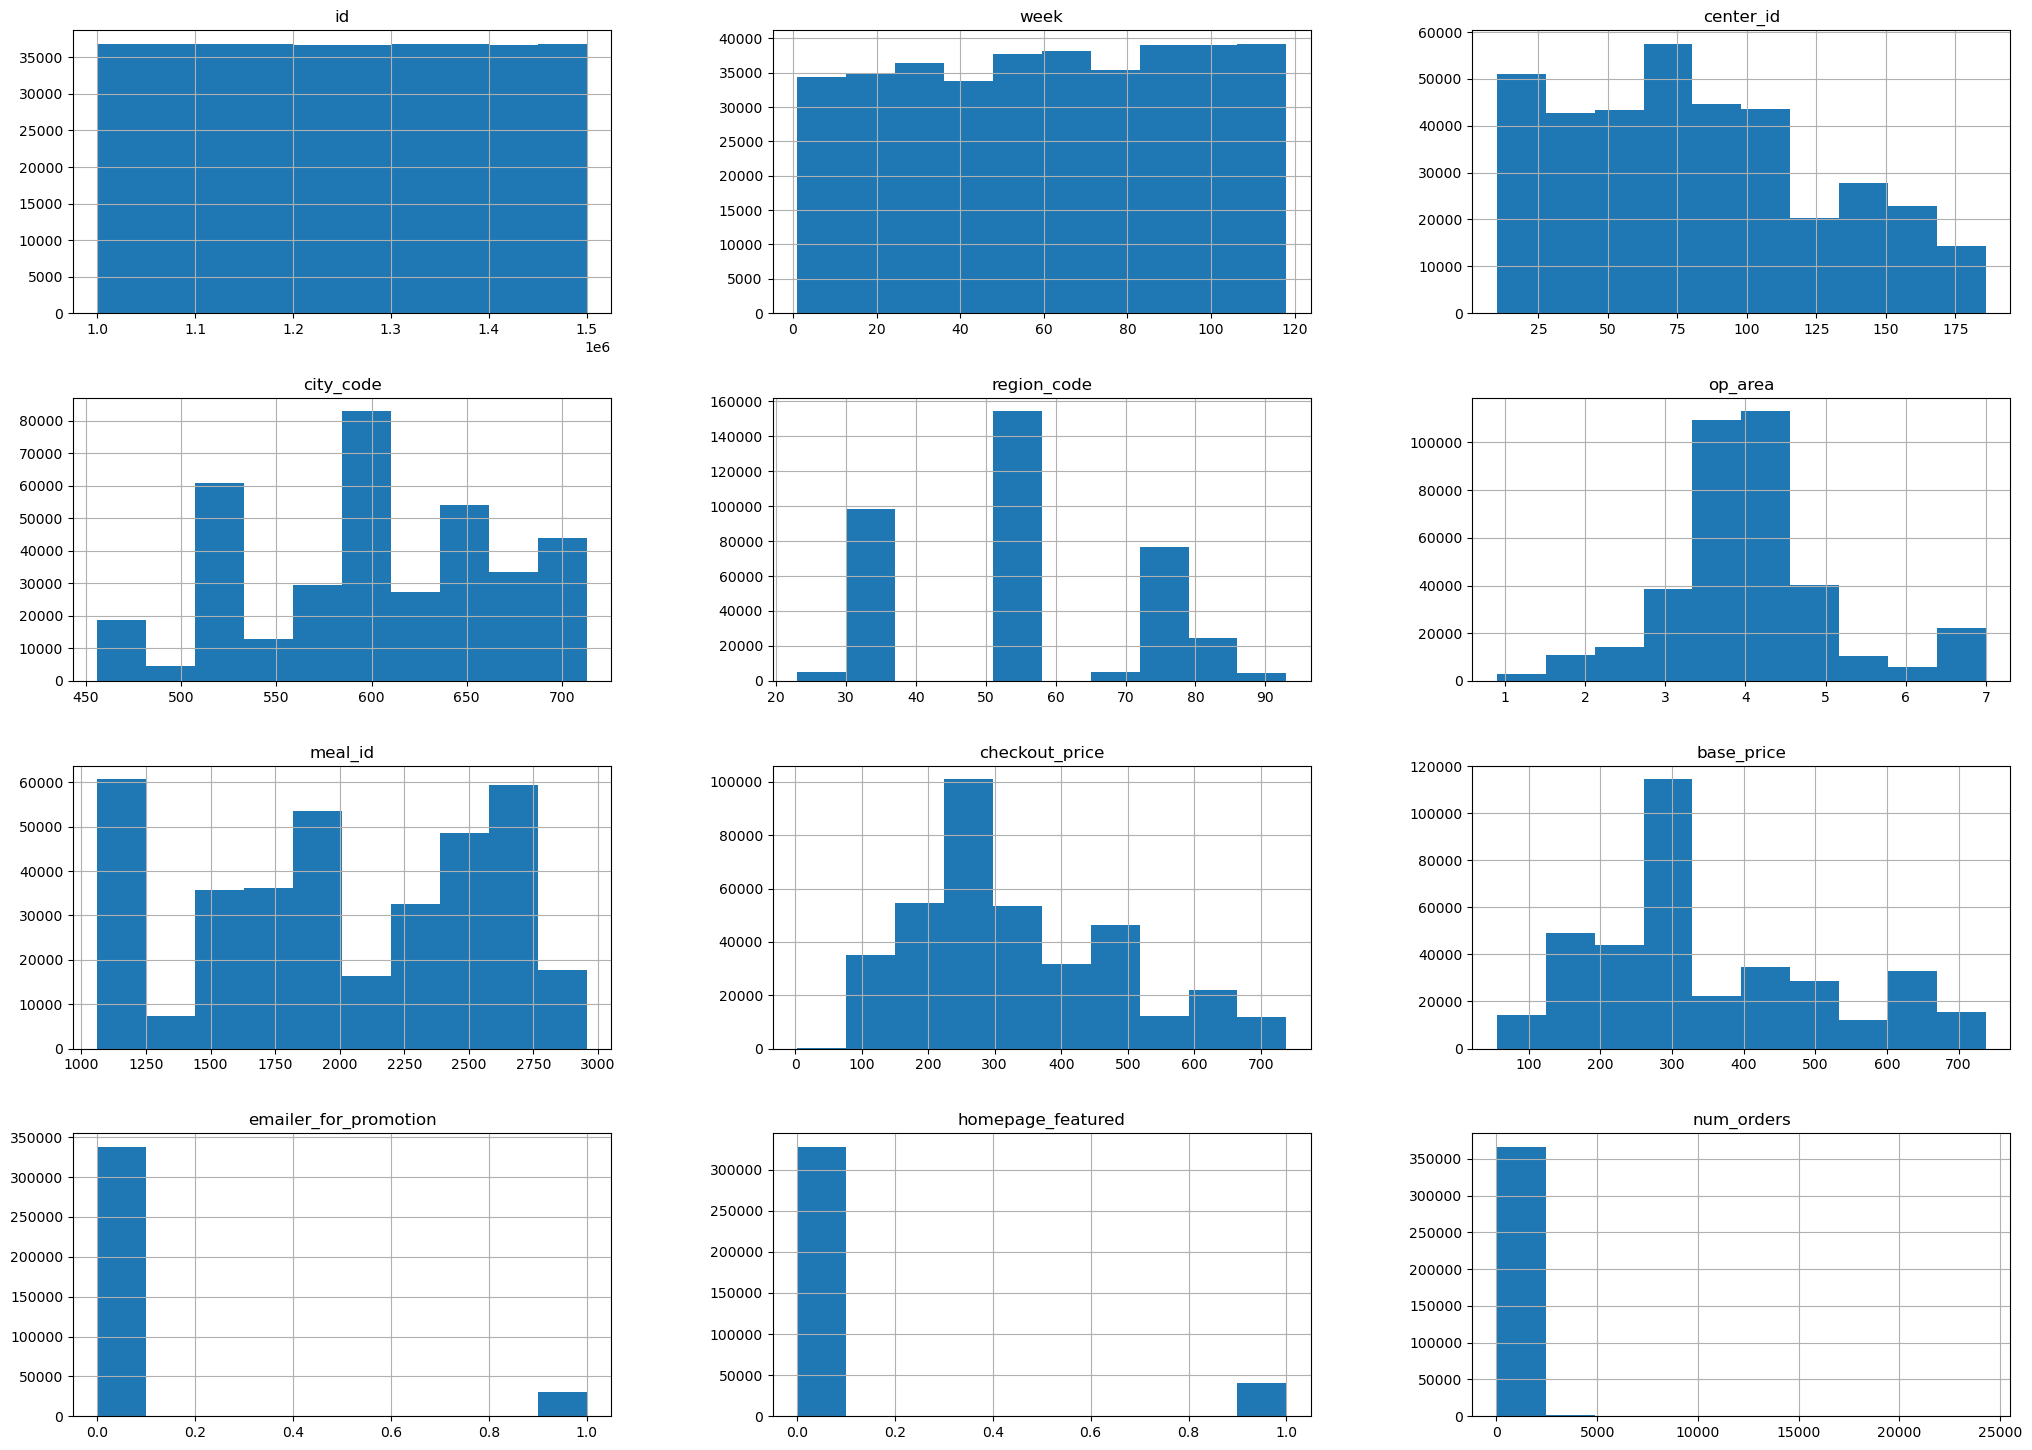

In [238]:
train_df.hist(figsize=(25, 18))

### 2.2.2 Count plots for categorical columns

Text(0.5, 1.0, 'Distribution of Cuisines')

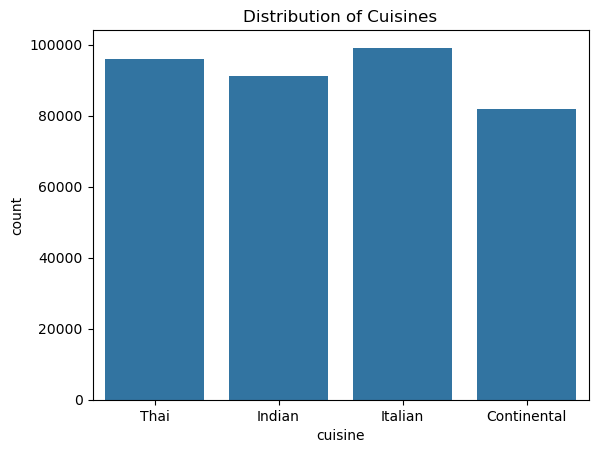

In [239]:
sns.countplot(x='cuisine', data=train_df)
plt.title('Distribution of Cuisines')

Text(0.5, 1.0, 'Distribution of Meal Categories')

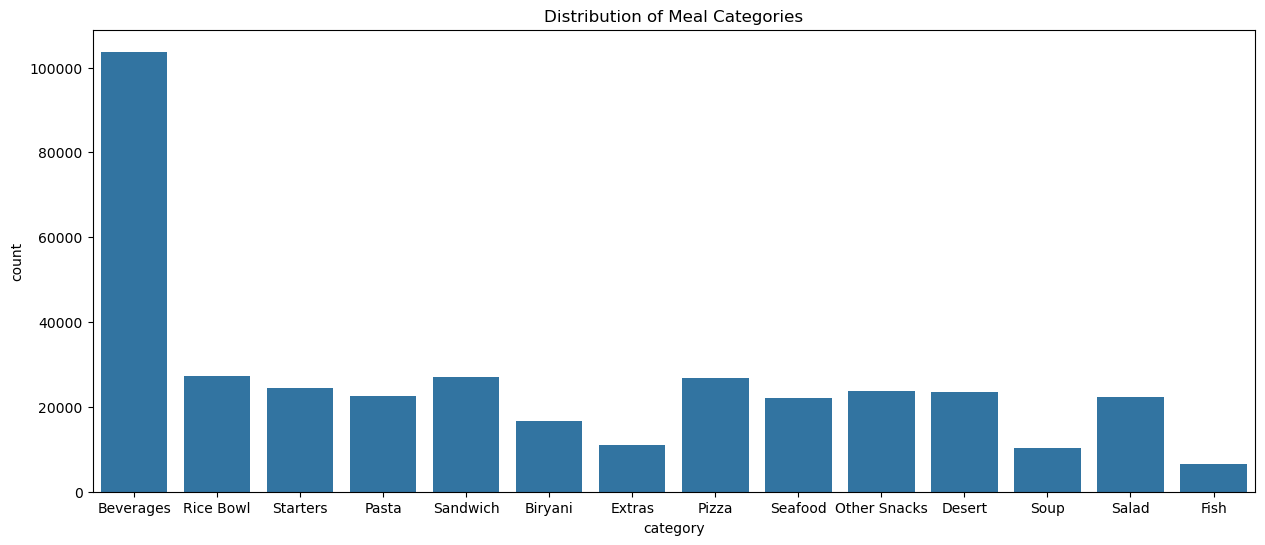

In [240]:
plt.figure(figsize=(15, 6))
sns.countplot(x='category', data=train_df)
plt.title('Distribution of Meal Categories')

### 2.2.3 Box Plots

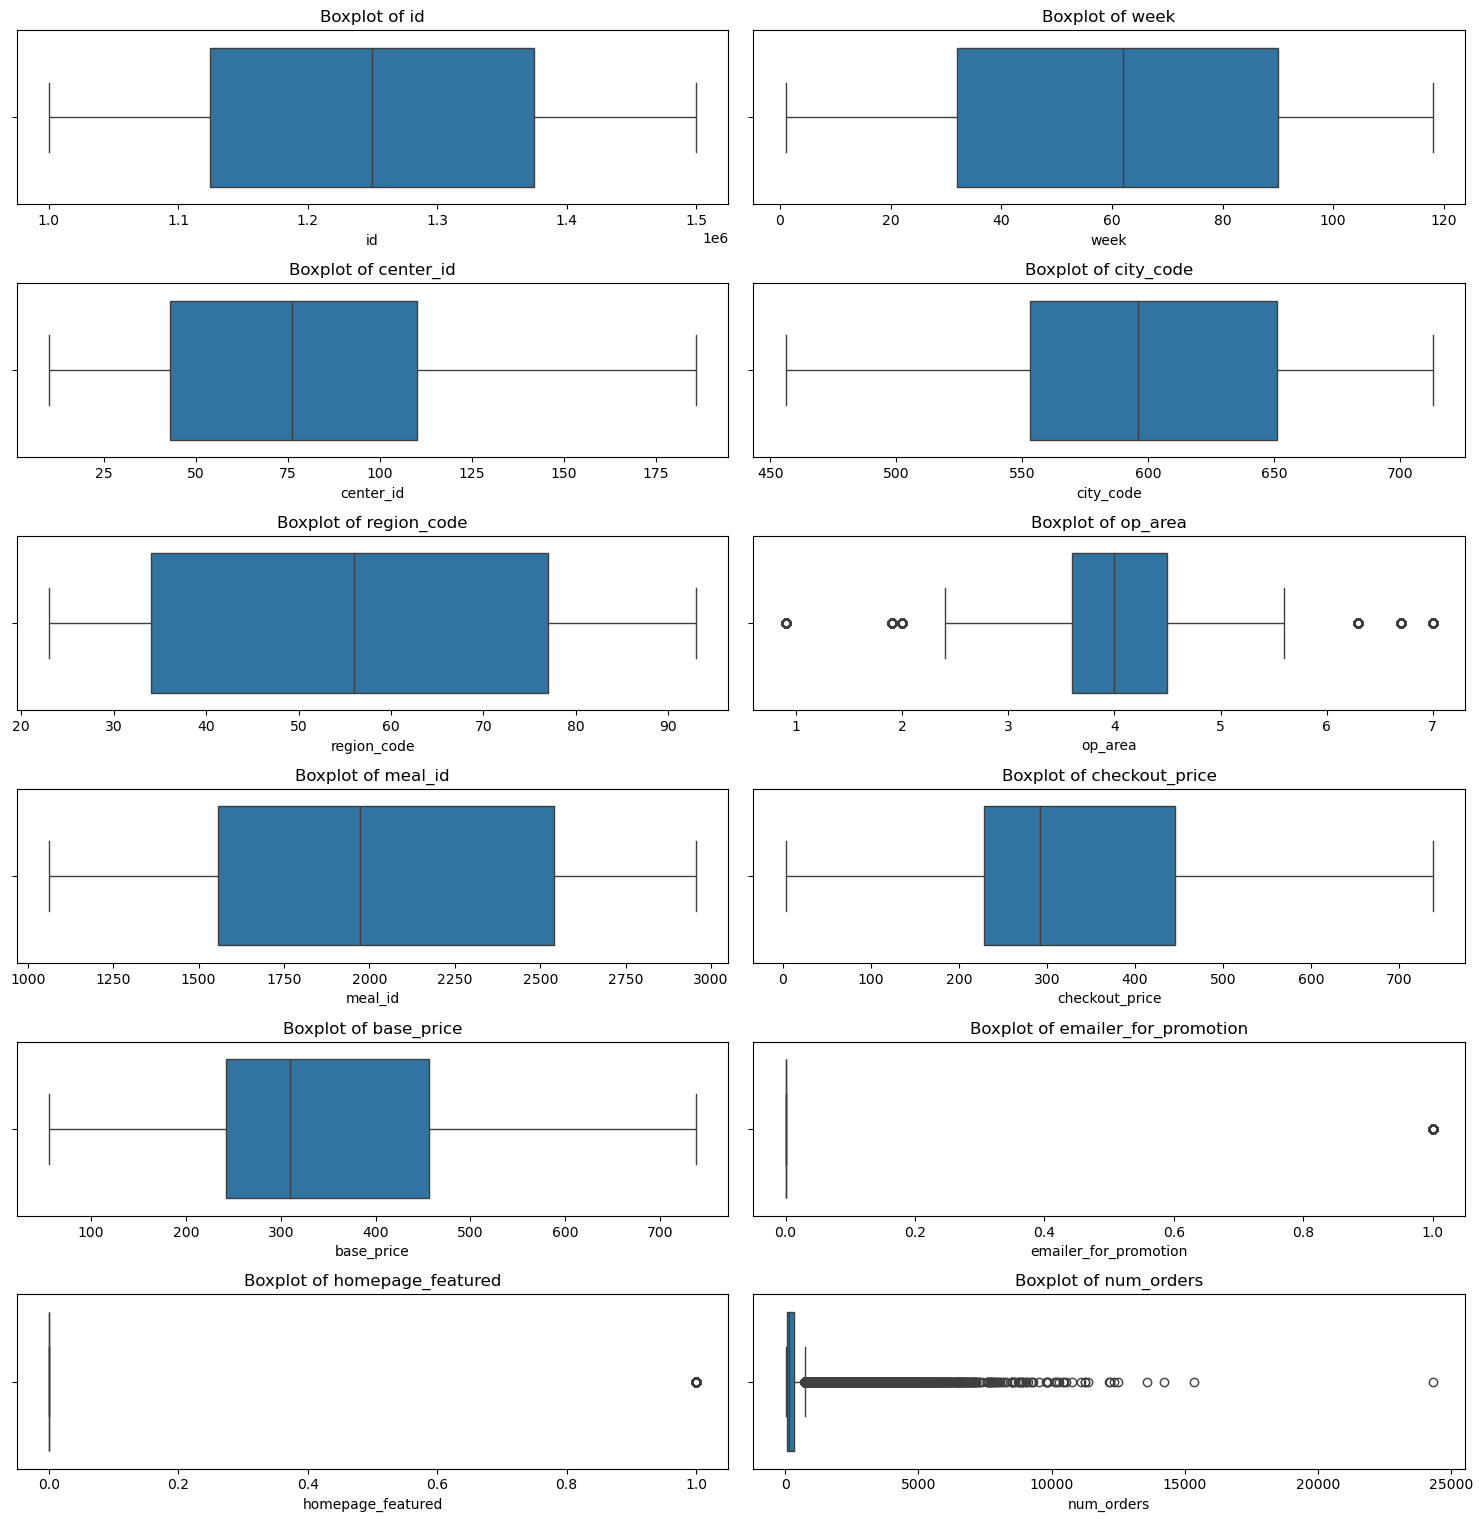

In [241]:

numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Plot boxplots for numerical columns to visualize outliers
plt.figure(figsize=(15, 25)) 
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(10, 2, i) 
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367916 entries, 0 to 367915
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     367916 non-null  int64  
 1   week                   367916 non-null  int64  
 2   center_id              367916 non-null  int64  
 3   city_code              367916 non-null  int64  
 4   region_code            367916 non-null  int64  
 5   center_type            367916 non-null  object 
 6   op_area                367916 non-null  float64
 7   meal_id                367916 non-null  int64  
 8   category               367916 non-null  object 
 9   cuisine                367916 non-null  object 
 10  checkout_price         367916 non-null  float64
 11  base_price             367916 non-null  float64
 12  emailer_for_promotion  367916 non-null  int64  
 13  homepage_featured      367916 non-null  int64  
 14  num_orders             367916 non-null  i

## 3.0 Feature Engineering 

In [243]:
train_encoded_df = train_df.copy()
test_encoded_df = test_df.copy()

### 3.1 Handling Categorical Columns

In [244]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [245]:
train_encoded_df = train_df.copy()
test_encoded_df = test_df.copy()

In [246]:
train_encoded_df.head()

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,647,56,TYPE_C,2.0,1885,Beverages,Thai,136.83,152.29,0,0,177
1,1466964,1,55,647,56,TYPE_C,2.0,1993,Beverages,Thai,136.83,135.83,0,0,270
2,1346989,1,55,647,56,TYPE_C,2.0,2539,Beverages,Thai,134.86,135.86,0,0,189
3,1338232,1,55,647,56,TYPE_C,2.0,2139,Beverages,Indian,339.50,437.53,0,0,54
4,1448490,1,55,647,56,TYPE_C,2.0,2631,Beverages,Indian,243.50,242.50,0,0,40


In [247]:
# List of columns to encode
columns_to_encode = ['category', 'cuisine', 'center_type']

# Iterate over the columns and apply label encoding
for col in columns_to_encode:
    # Fit and transform the training set
    train_encoded_df[col] = label_encoder.fit_transform(train_encoded_df[col])
    
    # Transform the test set using the fitted encoder
    test_encoded_df[col] = label_encoder.transform(test_encoded_df[col])

In [248]:
train_encoded_df['center_type'].unique()

array([2, 1, 0])

In [249]:
train_df['center_type'].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

### 3.2 Handling Outliers

#### Checking for skewness

In [250]:
skew_values = train_encoded_df.skew()
print(skew_values)

id                       0.000698
week                    -0.053074
center_id                0.344484
city_code               -0.207895
region_code              0.056738
center_type              0.741330
op_area                  0.669982
meal_id                 -0.173890
category                 0.179505
cuisine                 -0.086900
checkout_price           0.668715
base_price               0.630065
emailer_for_promotion    3.049232
homepage_featured        2.495955
num_orders               7.047036
dtype: float64


In [251]:
train_encoded_df['num_orders'].describe()

count    367916.000000
mean        265.076689
std         402.489299
min          13.000000
25%          54.000000
50%         136.000000
75%         325.000000
max       24299.000000
Name: num_orders, dtype: float64

In [252]:
train_df_transformed = train_encoded_df.copy()

### 3.3 Applying Log Transformation

In [253]:
train_df_transformed['num_orders'] = np.log1p(train_df_transformed['num_orders'])

#### Skewness after handling outlier column      

In [254]:
skew_values = train_df_transformed.skew()
print(skew_values)

id                       0.000698
week                    -0.053074
center_id                0.344484
city_code               -0.207895
region_code              0.056738
center_type              0.741330
op_area                  0.669982
meal_id                 -0.173890
category                 0.179505
cuisine                 -0.086900
checkout_price           0.668715
base_price               0.630065
emailer_for_promotion    3.049232
homepage_featured        2.495955
num_orders              -0.023727
dtype: float64


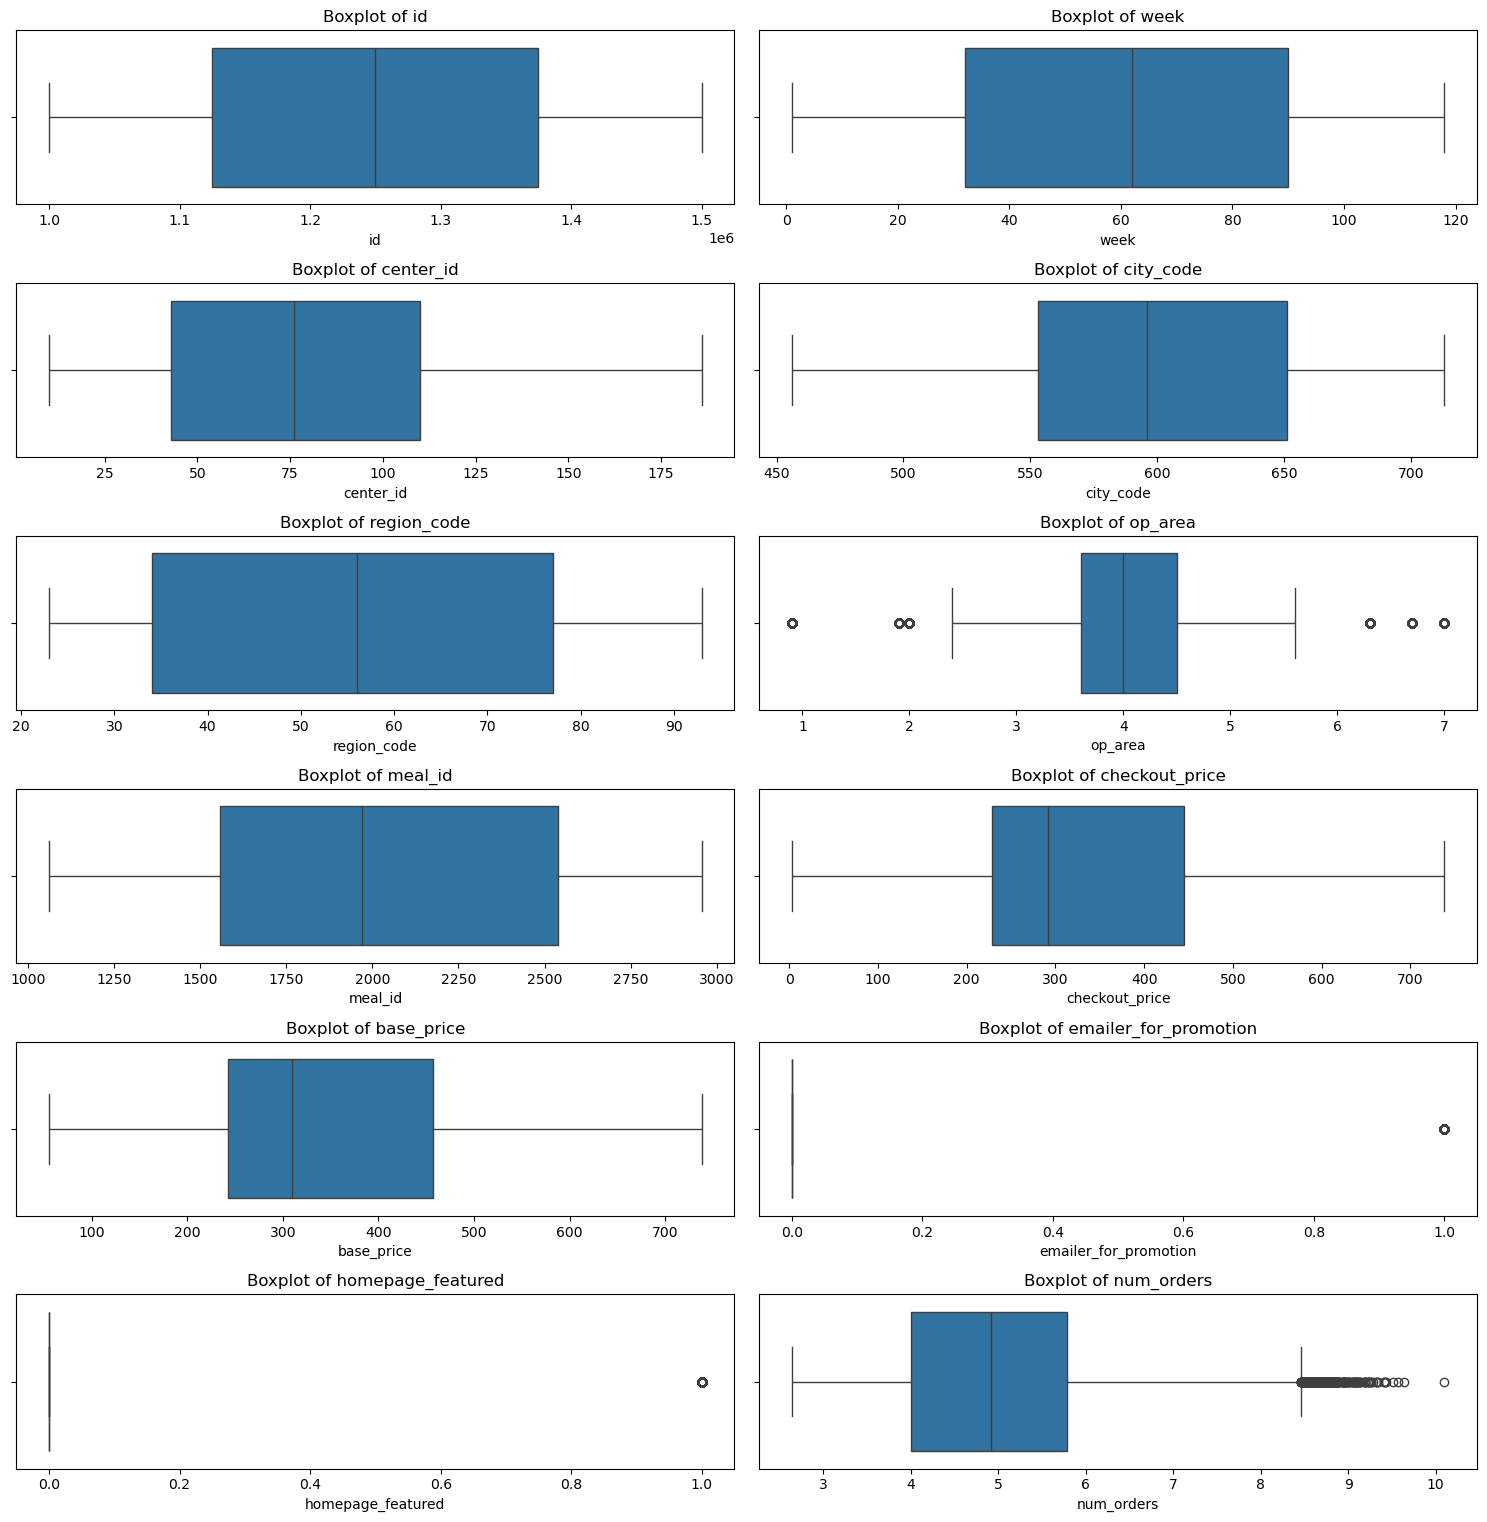

In [255]:
numerical_columns = train_df_transformed.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Plot boxplots for numerical columns to visualize outliers
plt.figure(figsize=(15, 25)) 
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(10, 2, i)  
    sns.boxplot(data=train_df_transformed, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

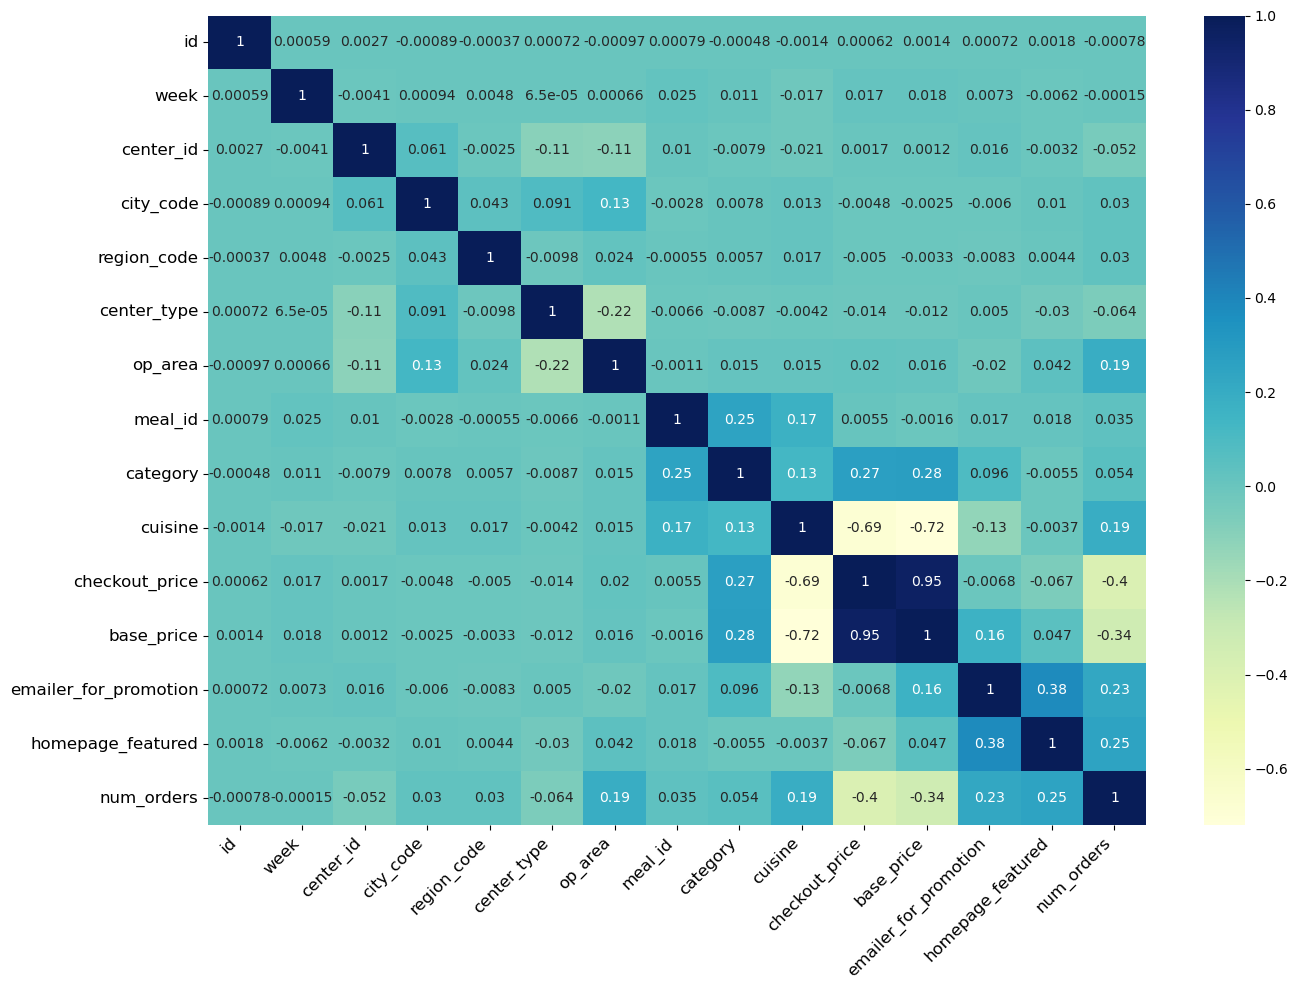

In [256]:
plt.figure(figsize = (14, 10))

# Plot labels
sns.heatmap(train_df_transformed.corr(), cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

## 4.0 Training Preprocessing 

In [257]:
cleaned_train = train_df_transformed.drop(columns=["id"]).copy()
cleaned_test = test_encoded_df.copy()

### 4.1 Splitting Data

In [258]:
cleaned_train.head()

,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1,55,647,56,2,2.0,1885,0,3,136.83,152.29,0,0,5.181784
1,1,55,647,56,2,2.0,1993,0,3,136.83,135.83,0,0,5.602119
2,1,55,647,56,2,2.0,2539,0,3,134.86,135.86,0,0,5.247024
3,1,55,647,56,2,2.0,2139,0,1,339.50,437.53,0,0,4.007333
4,1,55,647,56,2,2.0,2631,0,1,243.50,242.50,0,0,3.713572


In [259]:
train_data = cleaned_train[cleaned_train['week'] <= 100]

val_data = cleaned_train[cleaned_train['week'] > 100]

In [260]:
train_data.head()

,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1,55,647,56,2,2.0,1885,0,3,136.83,152.29,0,0,5.181784
1,1,55,647,56,2,2.0,1993,0,3,136.83,135.83,0,0,5.602119
2,1,55,647,56,2,2.0,2539,0,3,134.86,135.86,0,0,5.247024
3,1,55,647,56,2,2.0,2139,0,1,339.50,437.53,0,0,4.007333
4,1,55,647,56,2,2.0,2631,0,1,243.50,242.50,0,0,3.713572


In [261]:
X_train = train_data.drop(["num_orders"], axis=1)
y_train = train_data["num_orders"]

# Validation data
X_val = val_data.drop(["num_orders"], axis=1)
y_val = val_data["num_orders"]

In [262]:
print(train_data.shape)
print(val_data.shape)

(309297, 14)
(58619, 14)


### 4.2 Model Selection

In [263]:
from sklearn.ensemble import RandomForestRegressor

demand_forcasting_model_1 = RandomForestRegressor(random_state=42)
demand_forcasting_model_1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 4.3 Model Prediction

In [264]:
val_predictions = demand_forcasting_model_1.predict(X_val)

In [265]:
y_val.describe()

count    58619.000000
mean         4.901297
std          1.211027
min          2.639057
25%          4.007333
50%          4.919981
75%          5.823046
max          9.075322
Name: num_orders, dtype: float64

In [266]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [267]:
mae = mean_absolute_error(y_val, val_predictions)
mse = mean_squared_error(y_val, val_predictions)
rmse = root_mean_squared_error(y_val, val_predictions)
r_squared = r2_score(y_val, val_predictions)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r_squared}")

MAE: 0.44311464870867157
MSE: 0.3406505577499038
RMSE: 0.5836527715602007
R²: 0.7677216581343809


## Feature Importance

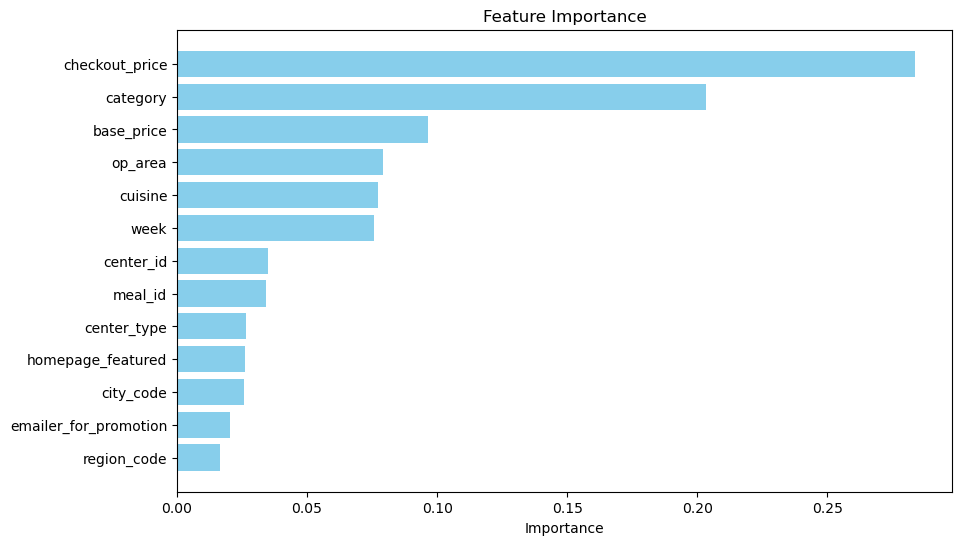

In [268]:
X_train_df = pd.DataFrame(X_train)

importances = demand_forcasting_model_1.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

## Saving The Model

In [ ]:
import joblib

In [ ]:
joblib.dump(demand_forcasting_model_1, 'demand_forcasting_model.pkl')